In [1]:
# load libaries
import psycopg2
import pandas as pd                # for dataframe
import numpy as np                   # for dealing with numpy
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
from sklearn.decomposition import PCA  # to apply PCA
from IPython.display import display
import sys
# a magic function that renders the figure in a notebook
%matplotlib Inline

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Define your database connection parameters
db_params = { "dbname": "IBM_MarketScan", "user": "faa_student", "password": "deM%9tAch^", "host": "pixel.ourcloud.ou.edu", "port": "5432" }

# Establish a connection to the database
try:
    connection = psycopg2.connect(**db_params)
    cursor = connection.cursor()
    print("Connected to the database")
except Exception as e:
    print(f"Error: {e}")
    
df = pd.read_sql_query(f"SELECT * FROM data_df", connection)

# Close the cursor and connection
cursor.close()
connection.close()

df.head()

Connected to the database


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VII,target_IX,target_X,target_XIX
0,2291314402,60,1,5,2,1,0,3,0,5,69,0,0,0,5,4,0,1,0,0,10,2,1,0,1,5,0,0,0,8,0,0,3,0,0,1,0,0
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,1,1
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1455831702,57,1,5,1,0,0,1,0,0,54,3,0,0,1,3,1,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,25068070301,48,1,4,0,0,2,2,0,3,90,10,0,0,3,6,0,0,0,0,11,4,0,0,0,2,0,0,0,4,0,0,0,0,0,1,0,0


In [3]:
df_IX = df[df['IX']==0]
df_IX.head()

,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VII,target_IX,target_X,target_XIX
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,1,1
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,2308096905,23,2,2,1,0,0,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0
9,25384664001,39,1,3,1,0,0,1,0,1,18,1,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0
10,2631532101,32,2,2,0,1,0,0,1,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0


In [4]:
# Set Input Variables and Target Variable
X = df_IX.drop(columns = ['enrolid', 'IX', 'XXII', 'target_VII', 'target_IX', 'target_X', 'target_XIX'], axis = 1)
y = df_IX['target_IX']

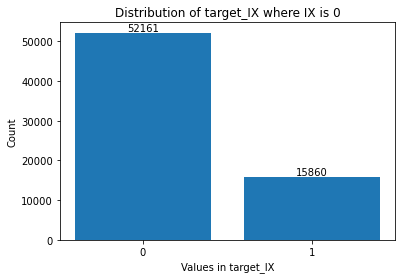

In [5]:
# Count the occurrences of 0 and 1 in target_IX
value_counts = y.value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0', '1'])
plt.xlabel('Values in target_IX')
plt.ylabel('Count')
plt.title('Distribution of target_IX where IX is 0')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [7]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

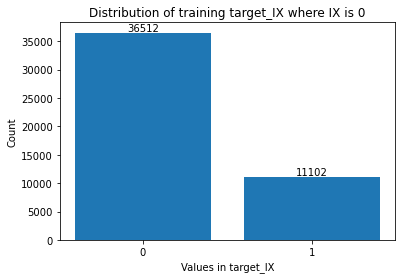

In [9]:
# Count the occurrences of 0 and 1 in target_IX
value_counts = y_train.value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0', '1'])
plt.xlabel('Values in target_IX')
plt.ylabel('Count')
plt.title('Distribution of training target_IX where IX is 0')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [10]:
# Assuming you have imbalanced classes, and you want to balance them
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled contain balanced data
print("X_train:", X_train.shape, "Y_train:", y_train.shape)
print("X_train_US:", X_train_us.shape, "Y_train_US:", y_train_us.shape)

X_train: (47614, 31) Y_train: (47614,)
X_train_US: (22204, 31) Y_train_US: (22204,)


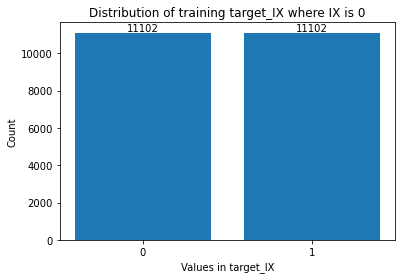

In [11]:
# Count the occurrences of 0 and 1 in target_IX
value_counts = y_train_us.value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0', '1'])
plt.xlabel('Values in target_IX')
plt.ylabel('Count')
plt.title('Distribution of training target_IX where IX is 0')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Calculating metrics with thresholds

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

Calculating metrics without thresholds

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, binary_predictions)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for max f1 threshold predictions')
    plt.show()
    
    # Calculate the Precision-Recall curve
    precision1, recall1, pr_thresholds1 = precision_recall_curve(y_test, binary_predictions)
    pr_auc1 = auc(recall1, precision1)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall1, precision1, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for max f1 threshold')
    plt.legend()
    plt.show()

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Assume you have already split your PCA-transformed data into X_train_pca, X_test_pca, and y_train, y_test
# Create a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
model.fit(X_train_us, y_train_us)

LogisticRegression(max_iter=1000, random_state=42)

In [16]:
# Make probability predictions
y_probabilities = model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3828,9427,6222,930,13255,7152,0.649532,0.380896,0.804540,0.517018,0.703471,0.352018,0.602403,0.703471,0.344182
1,0.45,3649,10165,5484,1109,13814,6593,0.676925,0.399540,0.766919,0.525376,0.708241,0.360759,0.649562,0.708241,0.354165
2,0.50,3437,10804,4845,1321,14241,6166,0.697849,0.414996,0.722362,0.527147,0.706379,0.364510,0.690396,0.706379,0.355420
3,0.55,3149,11503,4146,1609,14652,5755,0.717989,0.431666,0.661833,0.522526,0.698448,0.364536,0.735063,0.698448,0.350175
4,0.60,2815,12161,3488,1943,14976,5431,0.733866,0.446613,0.591635,0.508996,0.684373,0.359444,0.777110,0.684373,0.337472
5,0.65,2420,12913,2736,2338,15333,5074,0.751360,0.469356,0.508617,0.488199,0.666891,0.353291,0.825165,0.666891,0.324797
6,0.70,1913,13692,1957,2845,15605,4802,0.764689,0.494315,0.402060,0.443440,0.638502,0.338157,0.874944,0.638502,0.298784


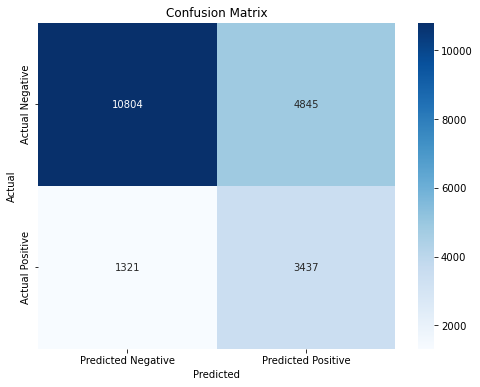

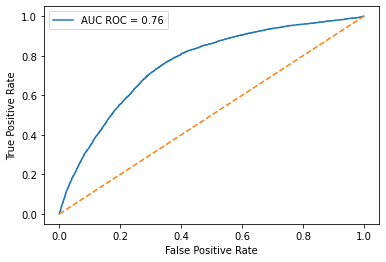

Accuracy: 0.6978487773803107
Precision: 0.4149963776865491
Recall: 0.7223623371164355
F1 Score: 0.5271472392638037
AUC-ROC: 0.7602676421005565
pr_auc 0.4656959361023481


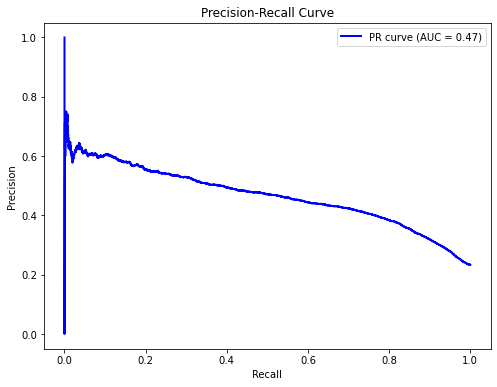

Max F1 Score: 0.528421219068701
Threshold for Max F1 Score: 0.5207505560458929
ROC-AUC for Max F1 Threshold: 0.7058532318822348


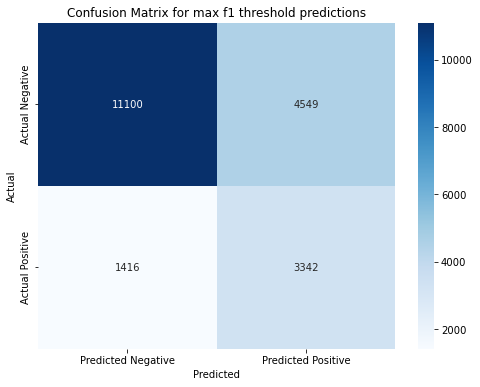

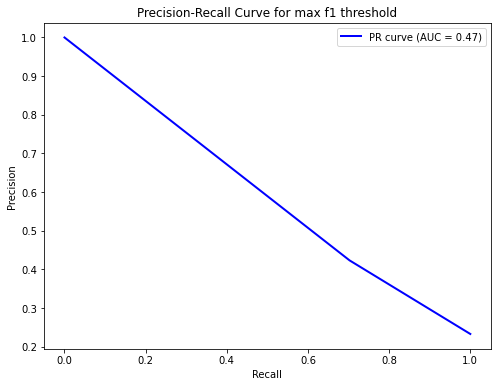

In [17]:
evaluate_classification_model(model, X_test, y_test)

In [18]:
# Predict on the training set 
y_train_pred = model.predict(X_train_us)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: .2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.70


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Instantiate a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=2000)

# Define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logreg, hyperparameters, scoring='roc_auc', cv=5)
gridsearch.fit(X_train_us, y_train_us)
best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Best Score: {gridsearch.best_score_}")

Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7573814608809133


In [24]:
# Train the model with the best hyperparameters on the full training set
logreg = LogisticRegression(random_state=42, max_iter=2000, **best_params)
logreg.fit(X_train_us, y_train_us)

LogisticRegression(C=10, max_iter=2000, penalty='l1', random_state=42,
                   solver='saga')

In [27]:
# Make probability predictions
y_probabilities = logreg.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3871,9125,6524,887,12996,7411,0.636840,0.372391,0.813577,0.510922,0.698341,0.346434,0.583104,0.698341,0.335525
1,0.45,3692,9880,5769,1066,13572,6835,0.665066,0.390234,0.775956,0.519305,0.703653,0.355041,0.631350,0.703653,0.345367
2,0.50,3471,10538,5111,1287,14009,6398,0.686480,0.404451,0.729508,0.520390,0.701453,0.358117,0.673398,0.701453,0.345115
3,0.55,3248,11221,4428,1510,14469,5938,0.709021,0.423137,0.682640,0.522438,0.699841,0.362844,0.717043,0.699841,0.348877
4,0.60,2940,11845,3804,1818,14785,5622,0.724506,0.435943,0.617907,0.511215,0.687412,0.358459,0.756917,0.687412,0.336939
5,0.65,2586,12549,3100,2172,15135,5272,0.741657,0.454801,0.543506,0.495213,0.672705,0.353621,0.801904,0.672705,0.325775
6,0.70,2118,13326,2323,2640,15444,4963,0.756799,0.476920,0.445145,0.460485,0.648351,0.341666,0.851556,0.648351,0.304044


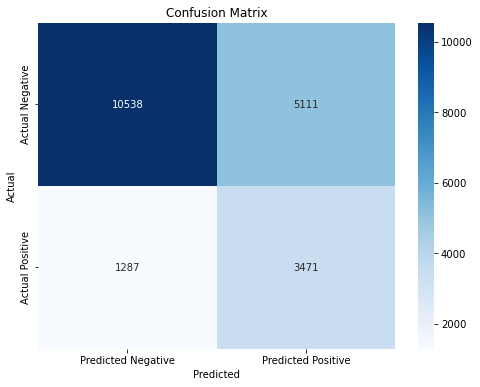

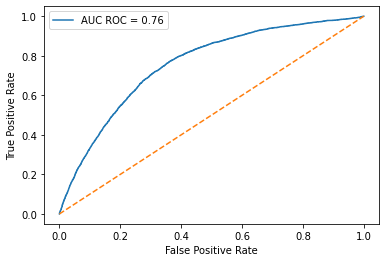

Accuracy: 0.6864801293673739
Precision: 0.40445117688184573
Recall: 0.7295081967213115
F1 Score: 0.5203898050974513
AUC-ROC: 0.756458417827342
pr_auc 0.45471674157745523


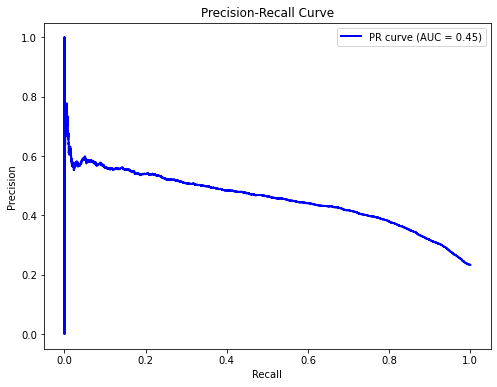

Max F1 Score: 0.5233325568755338
Threshold for Max F1 Score: 0.5253734571825536
ROC-AUC for Max F1 Threshold: 0.7023415581376128


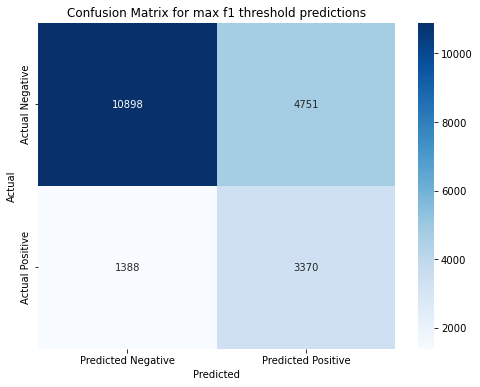

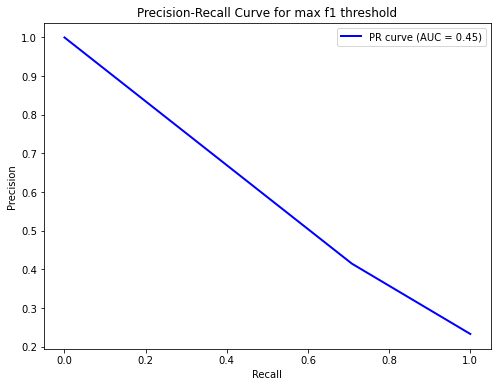

In [28]:
evaluate_classification_model(logreg, X_test, y_test)

In [29]:
# Predict on the training set 
y_train_pred = logreg.predict(X_train_us)

# Predict on the testing set
y_test_pred = logreg.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: .2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.69


# Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_us, y_train_us)

GaussianNB()

In [31]:
# Make probability predictions
y_probabilities = gnb.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3359,9703,5946,1399,13062,7345,0.640074,0.360989,0.705969,0.477707,0.663004,0.323402,0.620040,0.663004,0.276774
1,0.45,3295,9813,5836,1463,13108,7299,0.642329,0.360859,0.692518,0.474476,0.659793,0.321592,0.627069,0.659793,0.271774
2,0.50,3246,9930,5719,1512,13176,7231,0.645661,0.362075,0.682219,0.473074,0.658382,0.321107,0.634545,0.658382,0.269877
3,0.55,3194,10056,5593,1564,13250,7157,0.649287,0.363492,0.671290,0.471613,0.656944,0.320649,0.642597,0.656944,0.268044
4,0.60,3140,10171,5478,1618,13311,7096,0.652276,0.364354,0.659941,0.469498,0.654943,0.319739,0.649946,0.654943,0.265288
5,0.65,3075,10281,5368,1683,13356,7051,0.654481,0.364207,0.646280,0.465874,0.651627,0.317851,0.656975,0.651627,0.260361
6,0.70,3014,10414,5235,1744,13428,6979,0.658010,0.365378,0.633459,0.463443,0.649467,0.316913,0.665474,0.649467,0.257572


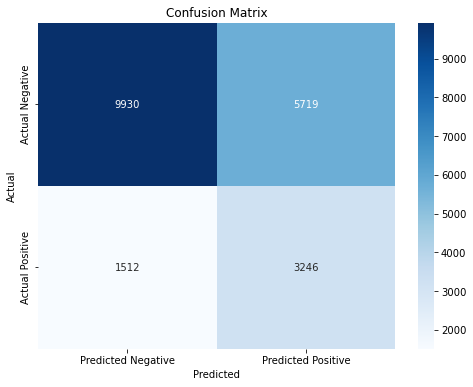

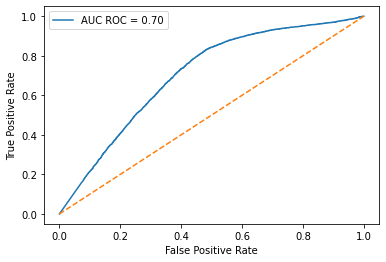

Accuracy: 0.645660802665752
Precision: 0.36207473508087007
Recall: 0.682219419924338
F1 Score: 0.4730744006412592
AUC-ROC: 0.7040693523331601
pr_auc 0.4114113125735398


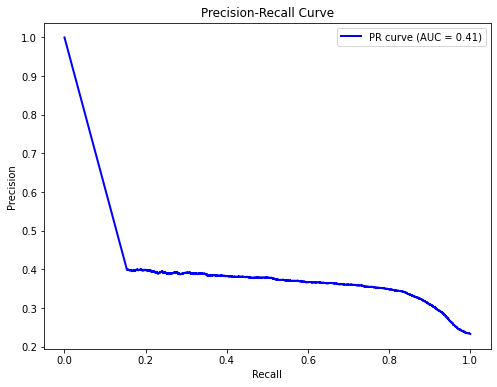

Max F1 Score: 0.48652307692307695
Threshold for Max F1 Score: 0.046033044226137874
ROC-AUC for Max F1 Threshold: 0.6745276212442187


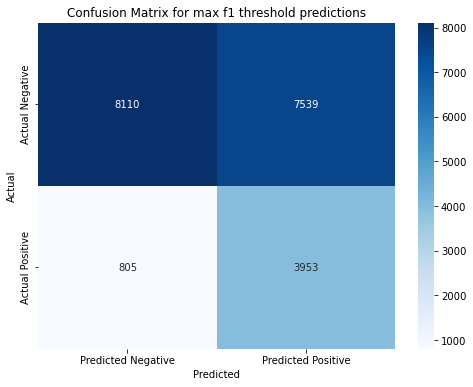

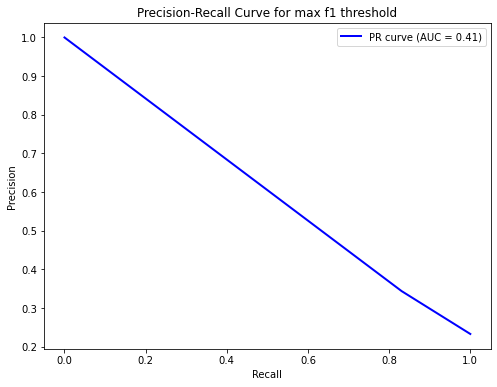

In [32]:
evaluate_classification_model(gnb, X_test, y_test)

In [33]:
# Predict on the training set 
y_train_pred = gnb.predict(X_train_us)

# Predict on the testing set
y_test_pred = gnb.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: .2f}')

Training Accuracy:  0.65
Testing Accuracy:  0.65


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_us,y_train_us)

KNeighborsClassifier()

In [35]:
y_probabilities = knn_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3989,7114,8535,769,11103,9304,0.544078,0.318508,0.838377,0.461636,0.646488,0.304713,0.454598,0.646488,0.254430
1,0.45,3126,10443,5206,1632,13569,6838,0.664919,0.375180,0.656999,0.477617,0.662163,0.326465,0.667327,0.662163,0.279009
2,0.50,3126,10443,5206,1632,13569,6838,0.664919,0.375180,0.656999,0.477617,0.662163,0.326465,0.667327,0.662163,0.279009
3,0.55,3126,10443,5206,1632,13569,6838,0.664919,0.375180,0.656999,0.477617,0.662163,0.326465,0.667327,0.662163,0.279009
4,0.60,3126,10443,5206,1632,13569,6838,0.664919,0.375180,0.656999,0.477617,0.662163,0.326465,0.667327,0.662163,0.279009
5,0.65,1868,13092,2557,2890,14960,5447,0.733082,0.422147,0.392602,0.406839,0.614602,0.307354,0.836603,0.614602,0.235184
6,0.70,1868,13092,2557,2890,14960,5447,0.733082,0.422147,0.392602,0.406839,0.614602,0.307354,0.836603,0.614602,0.235184


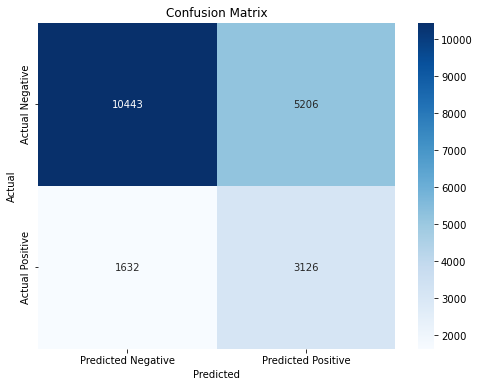

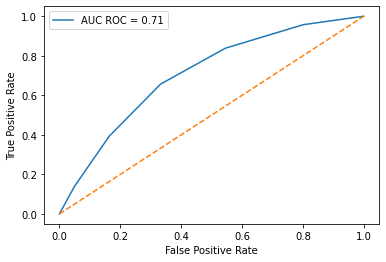

Accuracy: 0.6649189003773215
Precision: 0.3751800288046087
Recall: 0.6569987389659521
F1 Score: 0.47761650114591286
AUC-ROC: 0.7058498541364466
pr_auc 0.4273906004129986


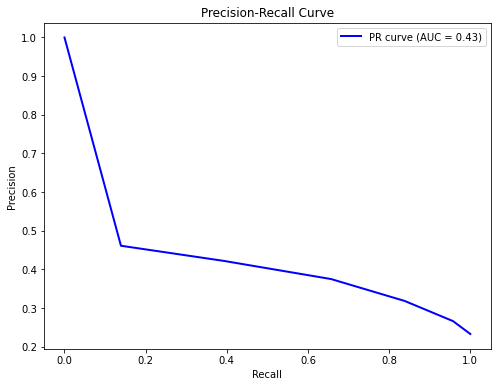

Max F1 Score: 0.47761650114591286
Threshold for Max F1 Score: 0.6
ROC-AUC for Max F1 Threshold: 0.6621628623579202


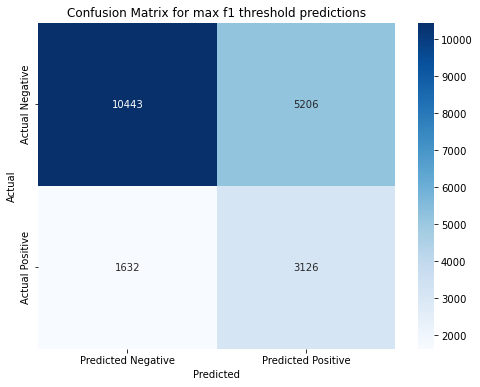

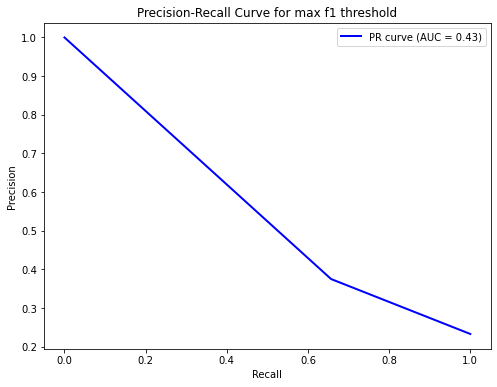

In [36]:
evaluate_classification_model(knn_model, X_test, y_test)

In [37]:
# Predict on the training set
y_train_pred = knn_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = knn_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.76
Testing Accuracy: 0.66


In [38]:
from sklearn.model_selection import GridSearchCV
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}

# Create a Grid Search object with the KNN model and hyperparameters to tune
grid_search = GridSearchCV(knn_tune_model, hyperparameters, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train_us, y_train_us)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validated score: {grid_search.best_score_}") 

Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 35, 'weights': 'uniform'}
Best cross-validated score: 0.694198916322312


In [39]:
# Train the model with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train_us, y_train_us)

KNeighborsClassifier(leaf_size=20, n_neighbors=35)

In [40]:
# Make probability predictions
y_probabilities = knn_best.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3886,9016,6633,872,12902,7505,0.632234,0.369427,0.816730,0.508739,0.696434,0.344452,0.576139,0.696434,0.332400
1,0.45,3694,9888,5761,1064,13582,6825,0.665556,0.390693,0.776377,0.519806,0.704119,0.355464,0.631861,0.704119,0.346172
2,0.50,3434,10731,4918,1324,14165,6242,0.694125,0.411159,0.721732,0.523875,0.703731,0.361626,0.685731,0.703731,0.350400
3,0.55,3083,11605,4044,1675,14688,5719,0.719753,0.432580,0.647961,0.518805,0.694771,0.362375,0.741581,0.694771,0.345508
4,0.60,2878,12055,3594,1880,14933,5474,0.731759,0.444685,0.604876,0.512556,0.687606,0.361104,0.770337,0.687606,0.340926
5,0.65,2333,12958,2691,2425,15291,5116,0.749302,0.464371,0.490332,0.476999,0.659186,0.346528,0.828040,0.659186,0.312497
6,0.70,1665,13863,1786,3093,15528,4879,0.760915,0.482469,0.349937,0.405652,0.617904,0.320399,0.885871,0.617904,0.265999


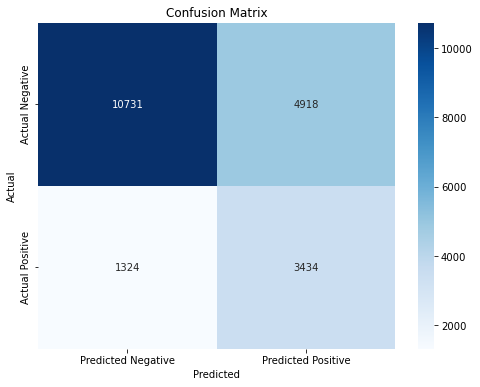

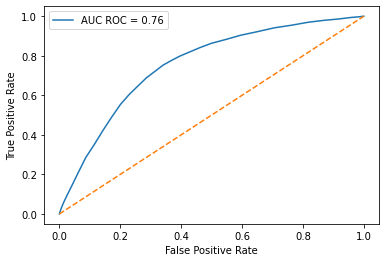

Accuracy: 0.6941245651002107
Precision: 0.4111590038314176
Recall: 0.7217318200924758
F1 Score: 0.5238749046529366
AUC-ROC: 0.755719974102964
pr_auc 0.4462884235665536


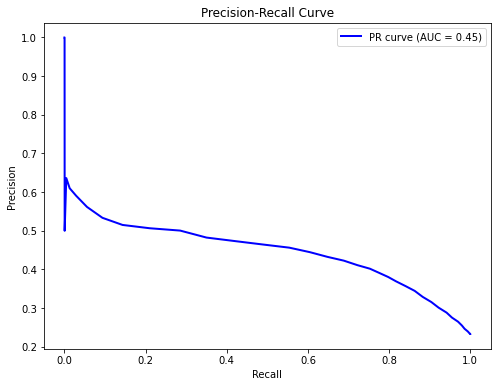

Max F1 Score: 0.5240359991219726
Threshold for Max F1 Score: 0.4857142857142857
ROC-AUC for Max F1 Threshold: 0.7060790573556276


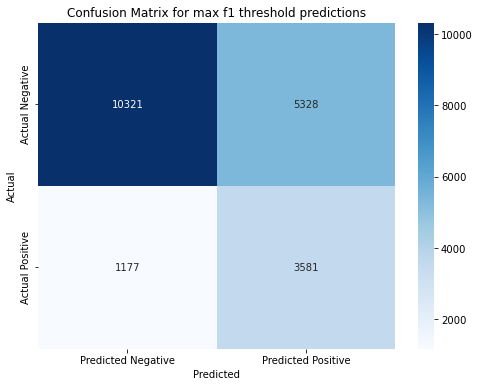

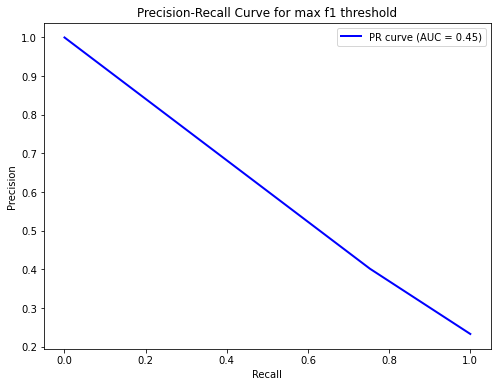

In [41]:
evaluate_classification_model(knn_best, X_test, y_test)

In [43]:
# Predict on the training set
y_train_pred = knn_best.predict(X_train_us)

# Predict on the testing set
y_test_pred = knn_best.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.71
Testing Accuracy: 0.69


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_model.fit(X_train_us, y_train_us)

RandomForestClassifier(random_state=42)

In [45]:
# Make probability predictions
y_probabilities = rf_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4196,7161,8488,562,11357,9050,0.556525,0.330810,0.881883,0.481137,0.669742,0.319276,0.457601,0.669742,0.295974
1,0.45,3995,8396,7253,763,12391,8016,0.607194,0.355174,0.839639,0.499188,0.688079,0.335607,0.536520,0.688079,0.319790
2,0.50,3725,9624,6025,1033,13349,7058,0.654138,0.382051,0.782892,0.513510,0.698942,0.349725,0.614991,0.698942,0.336815
3,0.55,3356,10783,4866,1402,14139,6268,0.692850,0.408173,0.705338,0.517103,0.697196,0.356602,0.689054,0.697196,0.340002
4,0.60,2855,11876,3773,1903,14731,5676,0.721860,0.430748,0.600042,0.501493,0.679470,0.351719,0.758898,0.679470,0.324099
5,0.65,2245,12931,2718,2513,15176,5231,0.743666,0.452347,0.471837,0.461887,0.649076,0.336578,0.826315,0.649076,0.293860
6,0.70,1582,13946,1703,3176,15528,4879,0.760915,0.481583,0.332493,0.393386,0.611834,0.315756,0.891175,0.611834,0.257344


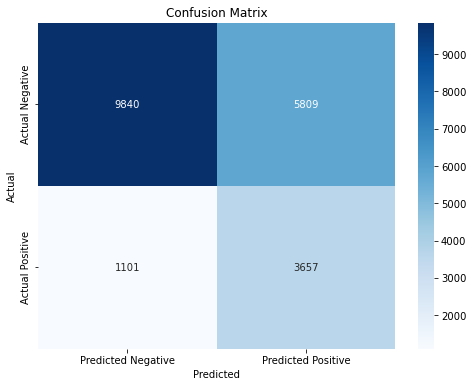

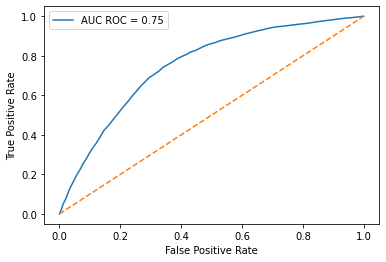

Accuracy: 0.6613906992698584
Precision: 0.3863300232410733
Recall: 0.7686002522068096
F1 Score: 0.5142013498312711
AUC-ROC: 0.7507282164742077
pr_auc 0.43655404411217946


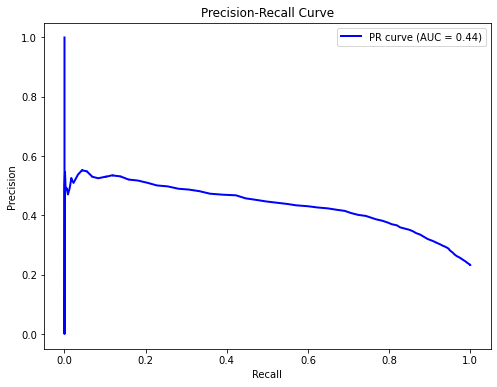

Max F1 Score: 0.5185418967965915
Threshold for Max F1 Score: 0.56
ROC-AUC for Max F1 Threshold: 0.6973803815313616


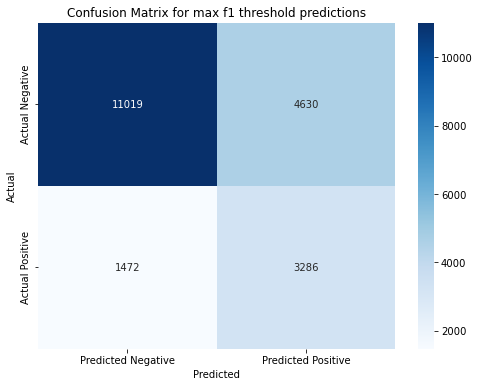

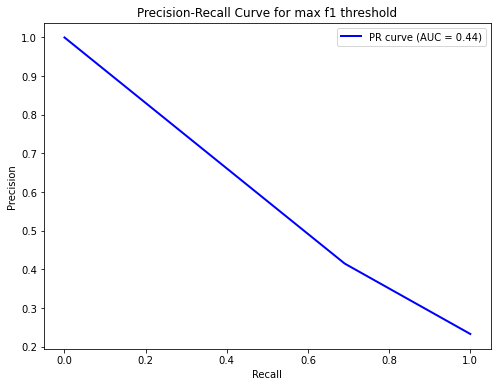

In [46]:
evaluate_classification_model(rf_model, X_test, y_test)

In [47]:
# Predict on the training set
y_train_pred = rf_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = rf_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 0.66


In [48]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [None,10,20,30],
    'min_samples_leaf': [1,5,10],
    'n_estimators': [50,100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy']  
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

grid_search.fit(X_train_us, y_train_us)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 200}
Best score: 0.7648729943920866


In [49]:
best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
best_rf_model.fit(X_train_us, y_train_us)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [50]:
# Make probability predictions
y_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4150,7888,7761,608,12038,8369,0.589896,0.348417,0.872215,0.497930,0.688136,0.333689,0.504058,0.688136,0.322758
1,0.45,3930,9131,6518,828,13061,7346,0.640025,0.376149,0.825977,0.516901,0.704733,0.351264,0.583488,0.704733,0.346376
2,0.50,3713,10052,5597,1045,13765,6642,0.674523,0.398818,0.780370,0.527865,0.711356,0.362434,0.642341,0.711356,0.358857
3,0.55,3437,10840,4809,1321,14277,6130,0.699613,0.416808,0.722362,0.528607,0.707529,0.365819,0.692696,0.707529,0.357650
4,0.60,3075,11687,3962,1683,14762,5645,0.723379,0.436976,0.646280,0.521407,0.696550,0.364881,0.746821,0.696550,0.349704
5,0.65,2531,12661,2988,2227,15192,5215,0.744450,0.458598,0.531946,0.492556,0.670504,0.353078,0.809061,0.670504,0.324617
6,0.70,1908,13701,1948,2850,15609,4798,0.764885,0.494813,0.401009,0.443000,0.638264,0.338082,0.875519,0.638264,0.298685


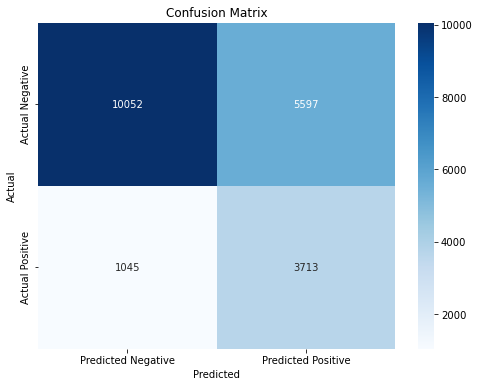

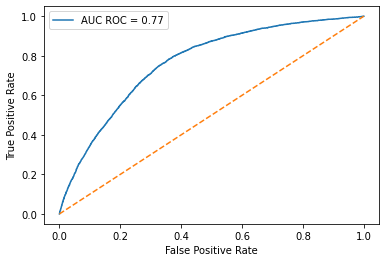

Accuracy: 0.6745234478365267
Precision: 0.3988184747583244
Recall: 0.780369903320723
F1 Score: 0.5278646573784476
AUC-ROC: 0.7658253232408706
pr_auc 0.4686584279377399


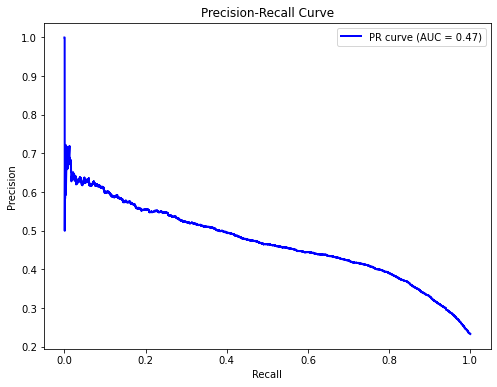

Max F1 Score: 0.5305939484497572
Threshold for Max F1 Score: 0.5334138344235012
ROC-AUC for Max F1 Threshold: 0.7109781049280144


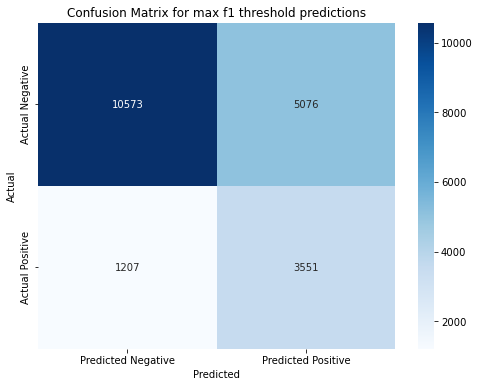

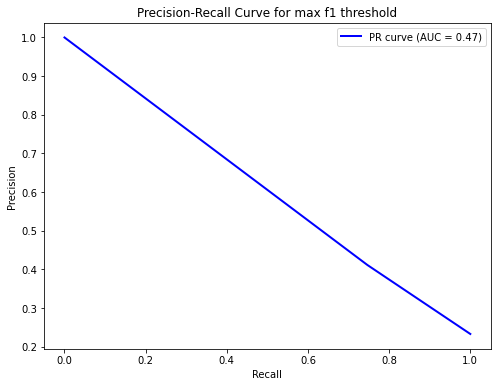

In [51]:
evaluate_classification_model(best_rf_model, X_test, y_test)

In [52]:
# Predict on the training set
y_train_pred = best_rf_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.75
Testing Accuracy: 0.67


# SVM Classifier 

In [53]:
from sklearn.svm import SVC

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(random_state=42,probability=True, kernel='linear')

# Train the SVM model on the training data
svm_classifier.fit(X_train_us, y_train_us)

SVC(kernel='linear', probability=True, random_state=42)

In [54]:
# Make probability predictions
y_probabilities = svm_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3752,9735,5914,1006,13487,6920,0.660901,0.388165,0.788567,0.520244,0.705326,0.355391,0.622084,0.705326,0.347763
1,0.45,3587,10352,5297,1171,13939,6468,0.683050,0.403760,0.753888,0.525876,0.707700,0.361772,0.661512,0.707700,0.354271
2,0.50,3387,10960,4689,1371,14347,6060,0.703043,0.419391,0.711854,0.527817,0.706109,0.365728,0.700364,0.706109,0.356439
3,0.55,3152,11513,4136,1606,14665,5742,0.718626,0.432492,0.662463,0.523327,0.699083,0.365208,0.735702,0.699083,0.351370
4,0.60,2855,12082,3567,1903,14937,5470,0.731955,0.444566,0.600042,0.510733,0.686052,0.360010,0.772062,0.686052,0.338808
5,0.65,2481,12802,2847,2277,15283,5124,0.748910,0.465653,0.521438,0.491969,0.669755,0.354388,0.818071,0.669755,0.326842
6,0.70,2053,13423,2226,2705,15476,4931,0.758367,0.479785,0.431484,0.454354,0.644619,0.339572,0.857754,0.644619,0.300435


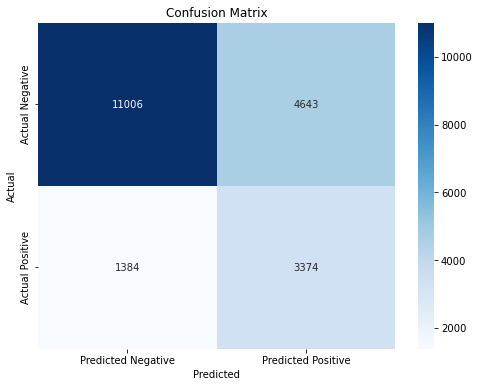

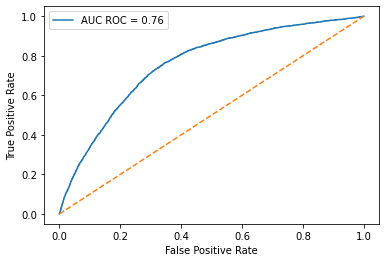

Accuracy: 0.7046601656294409
Precision: 0.42085568167643755
Recall: 0.7091214796132829
F1 Score: 0.5282191780821917
AUC-ROC: 0.7592720733538405
pr_auc 0.46289168417284954


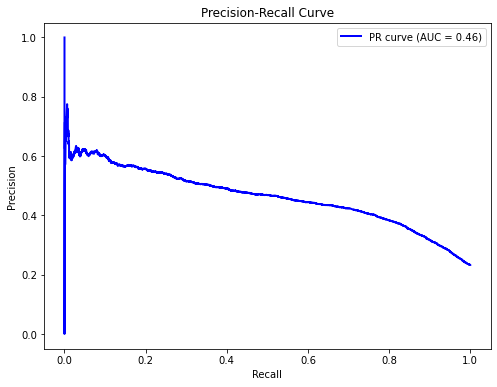

Max F1 Score: 0.5289726818006926
Threshold for Max F1 Score: 0.48499536048919445
ROC-AUC for Max F1 Threshold: 0.7078167363261263


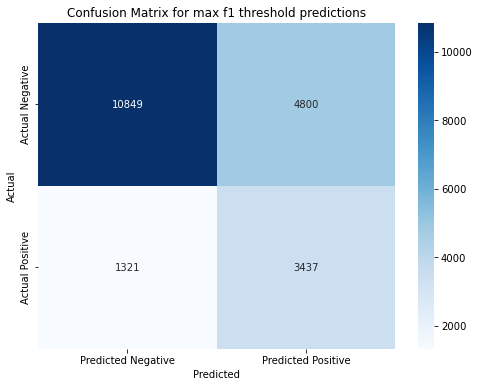

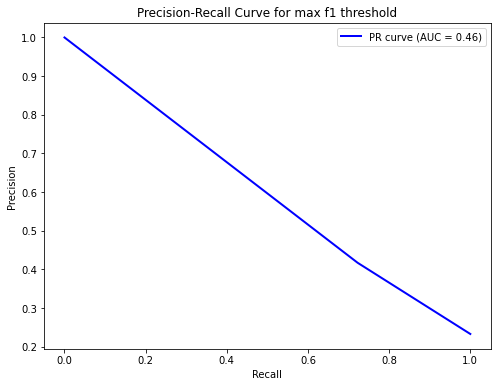

In [55]:
evaluate_classification_model(svm_classifier, X_test, y_test)

In [56]:
# Predict on the training set
y_train_pred = svm_classifier.predict(X_train_us)

# Predict on the testing set
y_test_pred = svm_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.70
Testing Accuracy: 0.70


In [57]:
from sklearn.model_selection import RandomizedSearchCV
svm_classifier = SVC(random_state=42,probability=True)

# Define the hyperparameters to search over
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                   'degree':[0,1,2,3,4]}

randomsearch = RandomizedSearchCV(svm_classifier, hyperparameters,cv=5,n_iter=2)
randomsearch.fit(X_train_us, y_train_us)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'kernel': 'sigmoid', 'gamma': 0.01, 'degree': 3, 'C': 1}


In [58]:
best_svc_model = SVC(random_state=42,probability=True, **best_params)
best_svc_model.fit(X_train_us, y_train_us)

SVC(C=1, gamma=0.01, kernel='sigmoid', probability=True, random_state=42)

In [59]:
# Make probability predictions
y_probabilities = best_svc_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3670,9286,6363,1088,12956,7451,0.634880,0.365793,0.771332,0.496248,0.682363,0.335463,0.593393,0.682363,0.308484
1,0.45,3514,10370,5279,1244,13884,6523,0.680355,0.399636,0.738546,0.518633,0.700604,0.356109,0.662662,0.700604,0.342583
2,0.50,3137,11467,4182,1621,14604,5803,0.715637,0.428610,0.659311,0.519500,0.696037,0.362021,0.732762,0.696037,0.345669
3,0.55,2922,11811,3838,1836,14733,5674,0.721958,0.432249,0.614124,0.507380,0.684434,0.355423,0.754745,0.684434,0.331387
4,0.60,2898,11852,3797,1860,14750,5657,0.722791,0.432860,0.609079,0.506068,0.683222,0.354792,0.757365,0.683222,0.330018
5,0.65,2280,12998,2651,2478,15278,5129,0.748665,0.462381,0.479193,0.470637,0.654895,0.342999,0.830596,0.654895,0.306002
6,0.70,1719,13742,1907,3039,15461,4946,0.757632,0.474076,0.361286,0.410067,0.619713,0.320197,0.878139,0.619713,0.264852


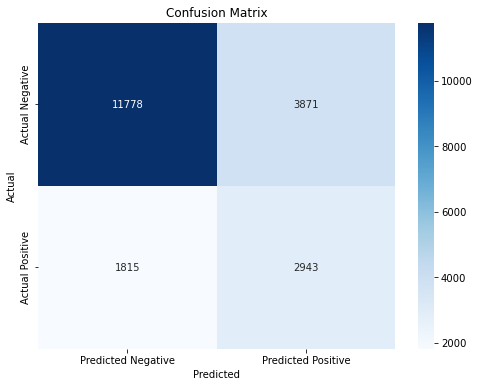

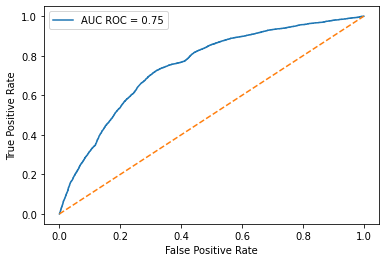

Accuracy: 0.7213701180967315
Precision: 0.43190490167302614
Recall: 0.6185372005044136
F1 Score: 0.508641548565503
AUC-ROC: 0.7498357529140411
pr_auc 0.4490500084226405


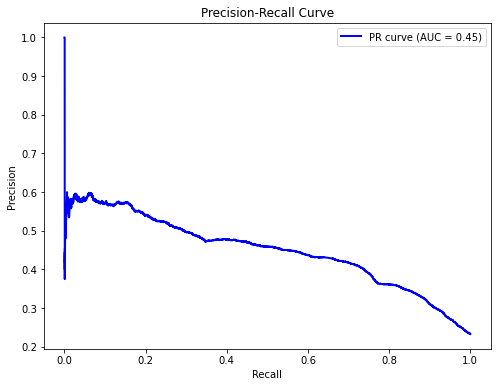

Max F1 Score: 0.5236811705814401
Threshold for Max F1 Score: 0.46867644193936764
ROC-AUC for Max F1 Threshold: 0.7030658730804028


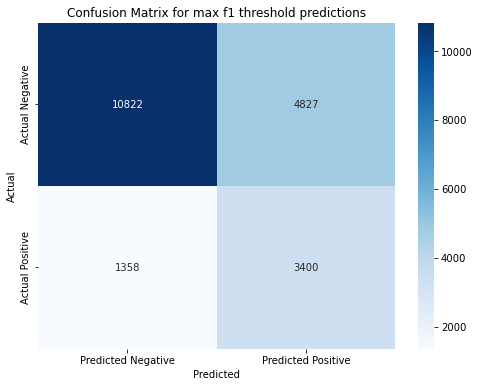

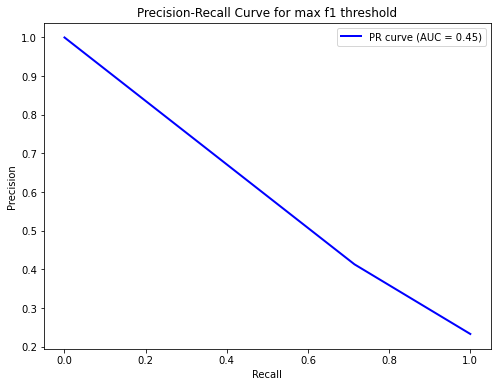

In [60]:
evaluate_classification_model(best_svc_model, X_test, y_test)

In [61]:
# Predict on the training set
y_train_pred = best_svc_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = best_svc_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.68
Testing Accuracy: 0.72


## XGBOOST

In [62]:
import xgboost as xgb

# Create an XGBoost classifier with default hyperparameters
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train_us, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
# Make probability predictions
y_probabilities = xgb_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3908,8632,7017,850,12540,7867,0.614495,0.357712,0.821354,0.498374,0.686477,0.335460,0.551601,0.686477,0.316192
1,0.45,3760,9279,6370,998,13039,7368,0.638947,0.371175,0.790248,0.505105,0.691597,0.342225,0.592945,0.691597,0.324067
2,0.50,3572,9938,5711,1186,13510,6897,0.662028,0.384789,0.750736,0.508796,0.692896,0.346992,0.635057,0.692896,0.327593
3,0.55,3338,10623,5026,1420,13961,6446,0.684128,0.399091,0.701555,0.508764,0.690192,0.349569,0.678829,0.690192,0.327042
4,0.60,3036,11360,4289,1722,14396,6011,0.705444,0.414471,0.638083,0.502524,0.682004,0.348850,0.725925,0.682004,0.320868
5,0.65,2693,12064,3585,2065,14757,5650,0.723134,0.428958,0.565994,0.488039,0.668453,0.343979,0.770912,0.668453,0.308672
6,0.70,2309,12816,2833,2449,15125,5282,0.741167,0.449047,0.485288,0.466465,0.652127,0.337925,0.818966,0.652127,0.296331


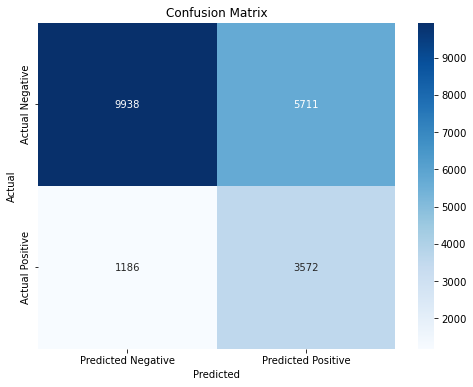

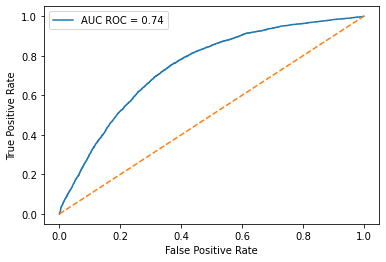

Accuracy: 0.6620277355809281
Precision: 0.38478939997845524
Recall: 0.7507356031946196
F1 Score: 0.5087956698240866
AUC-ROC: 0.7449477249854689
pr_auc 0.4346522423587428


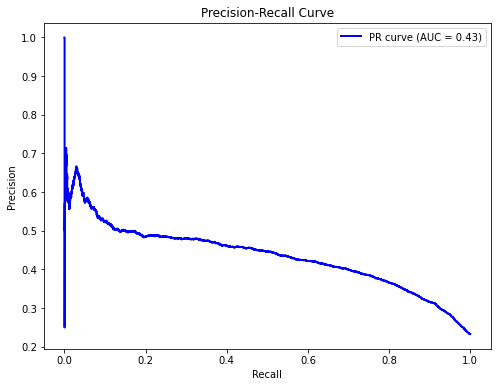

Max F1 Score: 0.5098130118992427
Threshold for Max F1 Score: 0.55887014
ROC-AUC for Max F1 Threshold: 0.690599016287611


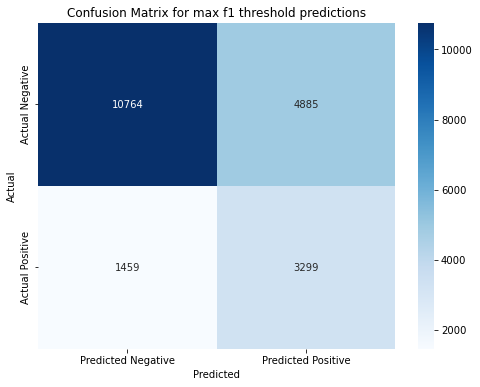

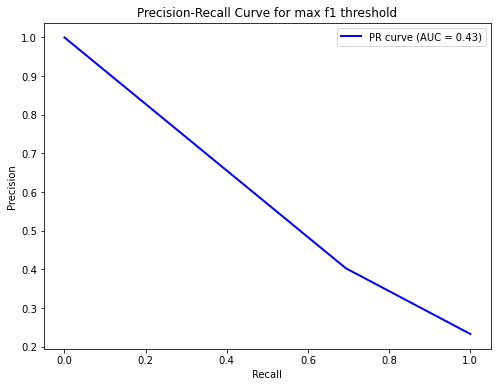

In [64]:
evaluate_classification_model(xgb_model, X_test, y_test)

In [65]:
# Predict on the training set
y_train_pred = xgb_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.79
Testing Accuracy: 0.66


In [66]:
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, roc_auc_score

# Define the hyperparameter grid for the random search
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used in each boosting round
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight (Hessian) needed in a child
    'subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting the trees
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used for fitting the trees
}

# Define the scoring metric as AUC-ROC
scoring_metric = make_scorer(roc_auc_score, greater_is_better=True)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random parameter settings to try
    scoring=scoring_metric,  # Use the appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42  # Set a random seed for reproducibility
)

# Perform the random search on your training data
random_search.fit(X_train_us, y_train_us)

best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'colsample_bytree': 0.7962072844310213, 'learning_rate': 0.02393512381599932, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 120, 'subsample': 0.7252496259847715}


In [67]:
# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_us, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7962072844310213, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02393512381599932,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
# Make probability predictions
y_probabilities = best_xgb_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4093,8273,7376,665,12366,8041,0.605969,0.356875,0.860235,0.504468,0.694448,0.339583,0.528660,0.694448,0.331440
1,0.45,3882,9312,6337,876,13194,7213,0.646543,0.379881,0.815889,0.518395,0.705472,0.352867,0.595054,0.705472,0.347527
2,0.50,3701,10094,5555,1057,13795,6612,0.675994,0.399849,0.777848,0.528186,0.711437,0.362817,0.645025,0.711437,0.359167
3,0.55,3454,10865,4784,1304,14319,6088,0.701671,0.419277,0.725935,0.531548,0.710114,0.368267,0.694294,0.710114,0.362162
4,0.60,3046,11669,3980,1712,14715,5692,0.721076,0.433533,0.640185,0.516972,0.692928,0.361434,0.745671,0.692928,0.343386
5,0.65,2506,12700,2949,2252,15206,5201,0.745136,0.459395,0.526692,0.490747,0.669123,0.352314,0.811553,0.669123,0.323177
6,0.70,1773,13869,1780,2985,15642,4765,0.766502,0.499015,0.372636,0.426663,0.629445,0.332224,0.886255,0.629445,0.288684


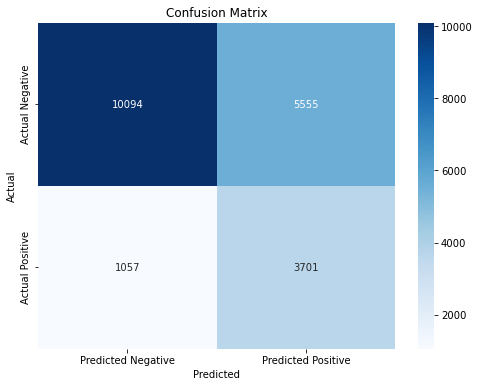

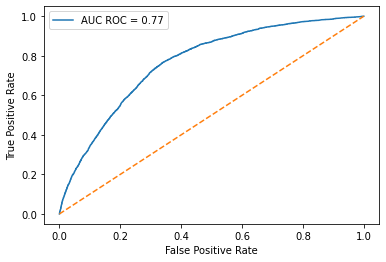

Accuracy: 0.6759935316313029
Precision: 0.3998487467588591
Recall: 0.7778478352248844
F1 Score: 0.528186099614671
AUC-ROC: 0.766628494781658
pr_auc 0.47590115406922534


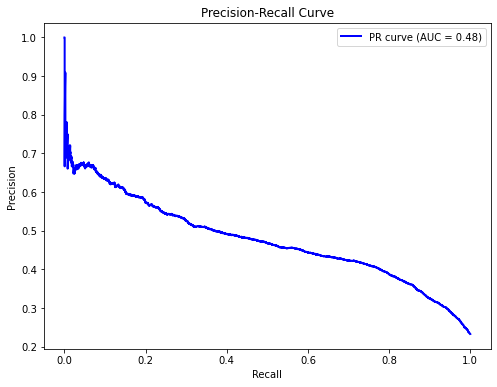

Max F1 Score: 0.5321307779030441
Threshold for Max F1 Score: 0.5353603
ROC-AUC for Max F1 Threshold: 0.7120267707640913


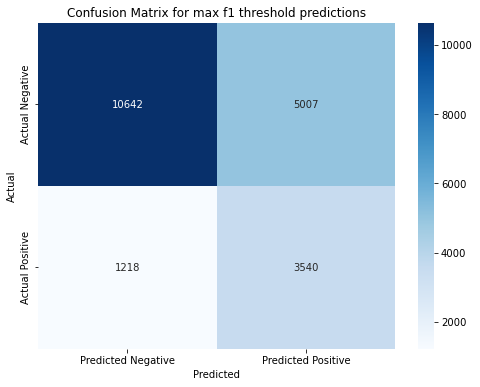

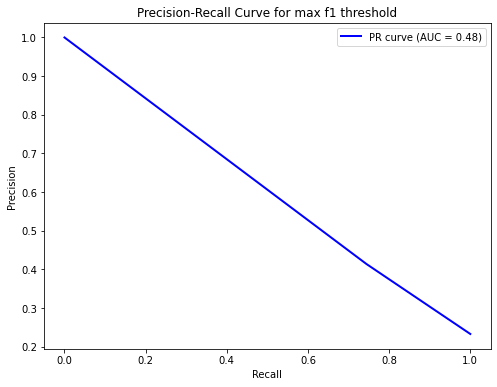

In [69]:
evaluate_classification_model(best_xgb_model, X_test, y_test)

In [70]:
# Predict on the training set
y_train_pred = best_xgb_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = best_xgb_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.72
Testing Accuracy: 0.68


# Gradient Boosting 

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_us, y_train_us)

GradientBoostingClassifier()

In [72]:
# Make probability predictions
y_probabilities = gb_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4056,8422,7227,702,12478,7929,0.611457,0.359479,0.852459,0.505704,0.695320,0.340841,0.538181,0.695320,0.332221
1,0.45,3891,9294,6355,867,13185,7222,0.646102,0.379758,0.817781,0.518662,0.705842,0.353044,0.593904,0.705842,0.348156
2,0.50,3721,9999,5650,1037,13720,6687,0.672318,0.397076,0.782051,0.526718,0.710503,0.361350,0.638955,0.710503,0.357227
3,0.55,3477,10733,4916,1281,14210,6197,0.696330,0.414274,0.730769,0.528781,0.708314,0.365511,0.685859,0.708314,0.358015
4,0.60,3158,11479,4170,1600,14637,5770,0.717254,0.430950,0.663724,0.522588,0.698627,0.364436,0.733529,0.698627,0.350141
5,0.65,2701,12409,3240,2057,15110,5297,0.740432,0.454637,0.567675,0.504907,0.680317,0.358885,0.792958,0.680317,0.335674
6,0.70,2120,13317,2332,2638,15437,4970,0.756456,0.476190,0.445565,0.460369,0.648273,0.341443,0.850981,0.648273,0.303614


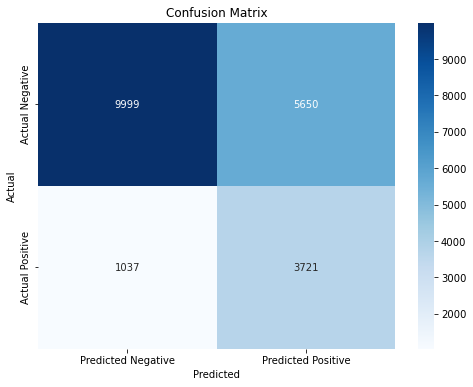

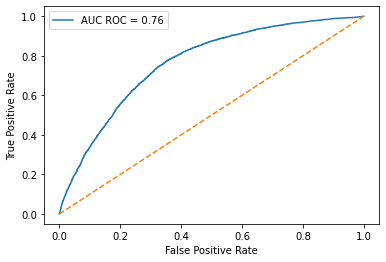

Accuracy: 0.6723183221443623
Precision: 0.3970760857966065
Recall: 0.782051282051282
F1 Score: 0.5267180975299031
AUC-ROC: 0.7648096491842334
pr_auc 0.4646541692607475


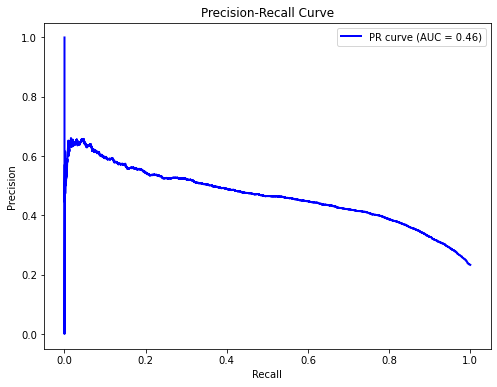

Max F1 Score: 0.5296271389075693
Threshold for Max F1 Score: 0.5388914590269891
ROC-AUC for Max F1 Threshold: 0.7100827471164861


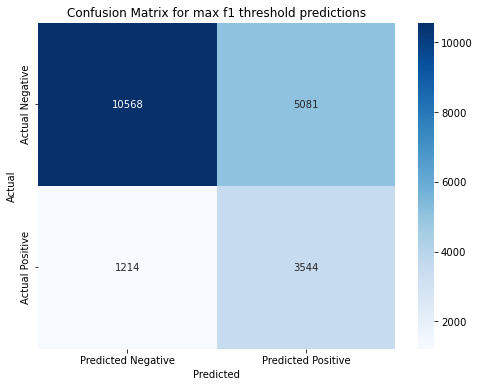

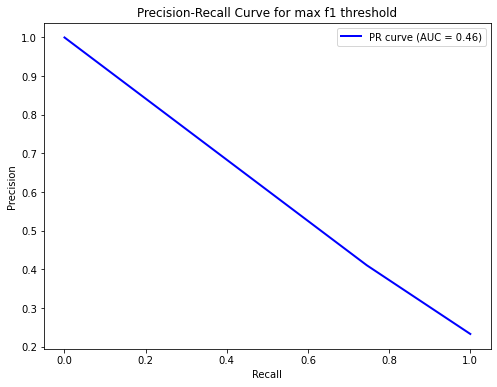

In [73]:
evaluate_classification_model(gb_model, X_test, y_test)

In [74]:
# Predict on the training set
y_train_pred = gb_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = gb_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.72
Testing Accuracy: 0.67


In [75]:
from sklearn.model_selection import RandomizedSearchCV

gb_model = GradientBoostingClassifier()

# Define a parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
random_search.fit(X_train_us, y_train_us)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}


In [76]:
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_us, y_train_us)

GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                           subsample=0.8)

In [77]:
# Make probability predictions
y_probabilities = best_gb_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4096,8276,7373,662,12372,8035,0.606263,0.357137,0.860866,0.504838,0.694859,0.339887,0.528852,0.694859,0.332141
1,0.45,3908,9218,6431,850,13126,7281,0.643211,0.377986,0.821354,0.517719,0.705200,0.352113,0.589047,0.705200,0.347099
2,0.50,3712,10000,5649,1046,13712,6695,0.671926,0.396539,0.780160,0.525816,0.709589,0.360621,0.639018,0.709589,0.355705
3,0.55,3445,10772,4877,1313,14217,6190,0.696673,0.413963,0.724044,0.526758,0.706197,0.364068,0.688351,0.706197,0.354839
4,0.60,3094,11591,4058,1664,14685,5722,0.719606,0.432606,0.650273,0.519563,0.695480,0.362853,0.740686,0.695480,0.346484
5,0.65,2652,12498,3151,2106,15150,5257,0.742392,0.457005,0.557377,0.502225,0.678011,0.357924,0.798645,0.678011,0.333711
6,0.70,2046,13482,2167,2712,15528,4879,0.760915,0.485640,0.430013,0.456136,0.645769,0.341727,0.861525,0.645769,0.304563


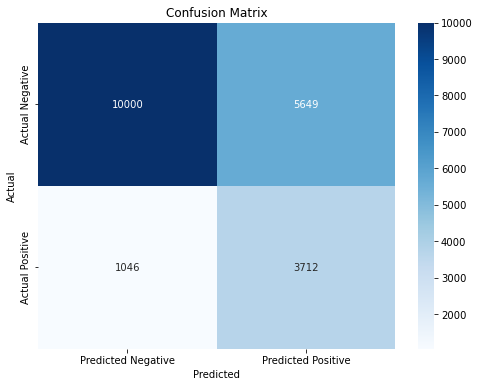

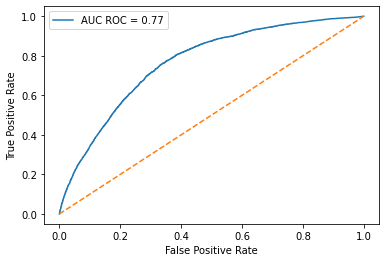

Accuracy: 0.6719262997990886
Precision: 0.39653883132144
Recall: 0.7801597309794032
F1 Score: 0.5258162759402224
AUC-ROC: 0.7665378194310017
pr_auc 0.47436650503238786


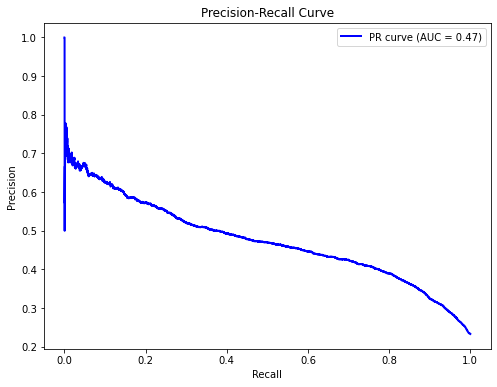

Max F1 Score: 0.5300707547169812
Threshold for Max F1 Score: 0.5272727695474281
ROC-AUC for Max F1 Threshold: 0.7112977551810389


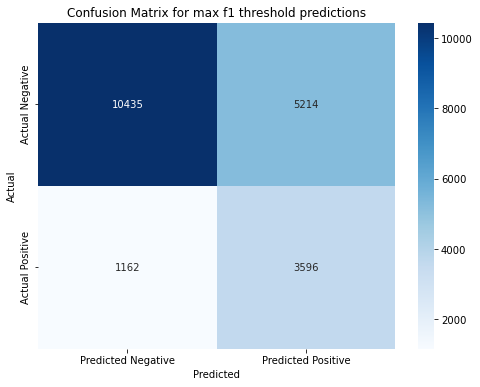

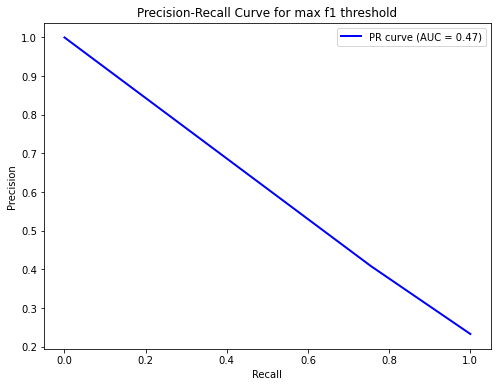

In [78]:
evaluate_classification_model(best_gb_model, X_test, y_test)

In [79]:
# Predict on the training set
y_train_pred = best_gb_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = best_gb_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.72
Testing Accuracy: 0.67


# MLP

In [80]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, random_state=42)
mlp.fit(X_train_us, y_train_us)

MLPClassifier(max_iter=500, random_state=42)

In [82]:
# Make probability predictions
y_probabilities = mlp.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3903,8749,6900,855,12652,7755,0.619983,0.361289,0.820303,0.501639,0.689690,0.338263,0.559077,0.689690,0.321389
1,0.45,3734,9466,6183,1024,13200,7207,0.646837,0.376525,0.784784,0.508893,0.694839,0.345670,0.604895,0.694839,0.329673
2,0.50,3497,10183,5466,1261,13680,6727,0.670358,0.390160,0.734973,0.509730,0.692843,0.348549,0.650713,0.692843,0.328604
3,0.55,3202,10926,4723,1556,14128,6279,0.692311,0.404038,0.672972,0.504928,0.685582,0.348154,0.698192,0.685582,0.322017
4,0.60,2906,11668,3981,1852,14574,5833,0.714167,0.421954,0.610761,0.499098,0.678184,0.348466,0.745607,0.678184,0.318677
5,0.65,2526,12376,3273,2232,14902,5505,0.730240,0.435592,0.530895,0.478545,0.660872,0.340628,0.790849,0.660872,0.301644
6,0.70,2129,13141,2508,2629,15270,5137,0.748273,0.459133,0.447457,0.453220,0.643596,0.334271,0.839734,0.643596,0.289796


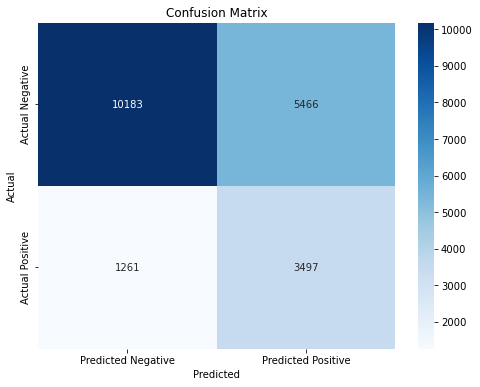

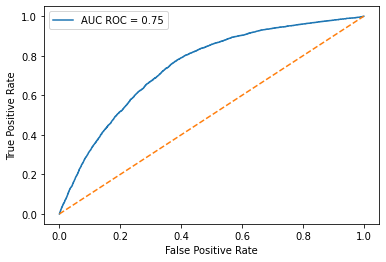

Accuracy: 0.6703582104179938
Precision: 0.39015954479526943
Recall: 0.7349726775956285
F1 Score: 0.509729611544348
AUC-ROC: 0.7467730037448523
pr_auc 0.4362117727723647


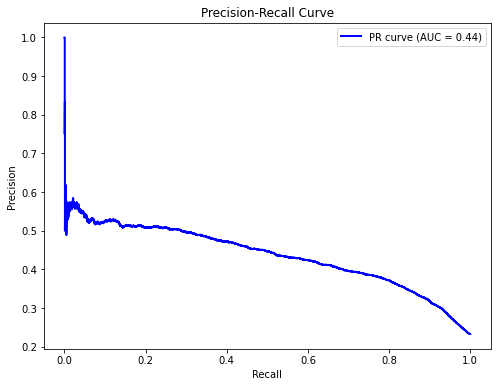

Max F1 Score: 0.511036979203634
Threshold for Max F1 Score: 0.48138315237862483
ROC-AUC for Max F1 Threshold: 0.6951994724753473


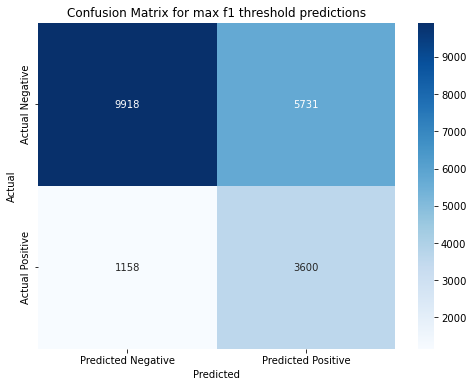

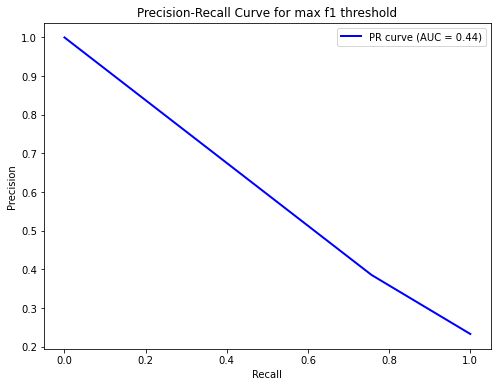

In [84]:
evaluate_classification_model(mlp, X_test, y_test)

In [85]:
# Predict on the training set
y_train_pred = mlp.predict(X_train_us)

# Predict on the testing set
y_test_pred = mlp.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.73
Testing Accuracy: 0.67


In [86]:
# Define a dictionary of hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a RandomSearchCV object
random_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')
random_search.fit(X_train_us, y_train_us)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}


In [88]:
best_mlp_model = MLPClassifier(max_iter=500, random_state=42, solver= 'adam', learning_rate_init= 0.01, 
                               hidden_layer_sizes= (100,), alpha= 0.0001, activation= 'tanh')
best_mlp_model.fit(X_train_us, y_train_us)

MLPClassifier(activation='tanh', learning_rate_init=0.01, max_iter=500,
              random_state=42)

In [89]:
# Make probability predictions
y_probabilities = best_mlp_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4021,8460,7189,737,12481,7926,0.611604,0.358698,0.845103,0.503632,0.692856,0.339251,0.540610,0.692856,0.327788
1,0.45,3866,9289,6360,892,13155,7252,0.644632,0.378056,0.812526,0.516017,0.703055,0.350891,0.593584,0.703055,0.343441
2,0.50,3684,9932,5717,1074,13616,6791,0.667222,0.391873,0.774275,0.520376,0.704474,0.356047,0.634673,0.704474,0.346914
3,0.55,3466,10622,5027,1292,14088,6319,0.690351,0.408101,0.728457,0.523130,0.703611,0.360596,0.678765,0.703611,0.349324
4,0.60,3181,11426,4223,1577,14607,5800,0.715784,0.429633,0.668558,0.523105,0.699350,0.364512,0.730143,0.699350,0.350629
5,0.65,2762,12221,3428,1996,14983,5424,0.734209,0.446204,0.580496,0.504567,0.680720,0.356829,0.780944,0.680720,0.332463
6,0.70,2286,13101,2548,2472,15387,5020,0.754006,0.472900,0.480454,0.476647,0.658816,0.348342,0.837178,0.658816,0.315893


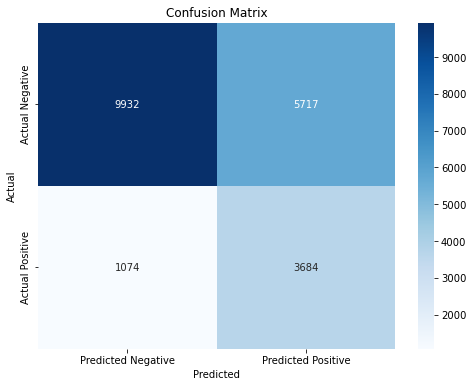

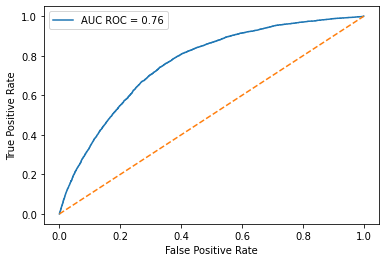

Accuracy: 0.6672220316558044
Precision: 0.39187320497819383
Recall: 0.7742749054224464
F1 Score: 0.520375732749488
AUC-ROC: 0.7632609292370719
pr_auc 0.46484947855170944


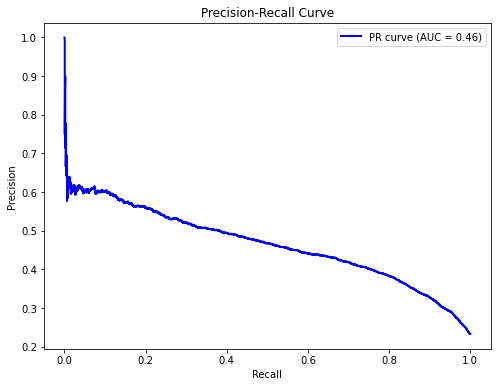

Max F1 Score: 0.5249906890130354
Threshold for Max F1 Score: 0.5411083289748735
ROC-AUC for Max F1 Threshold: 0.7060000664536229


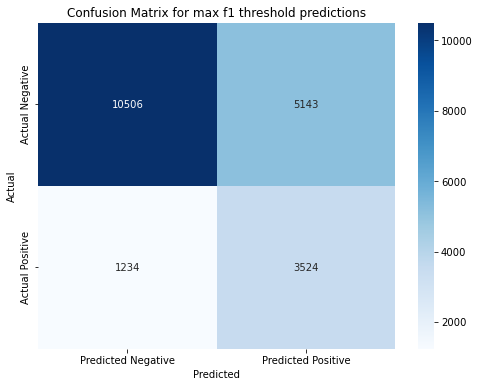

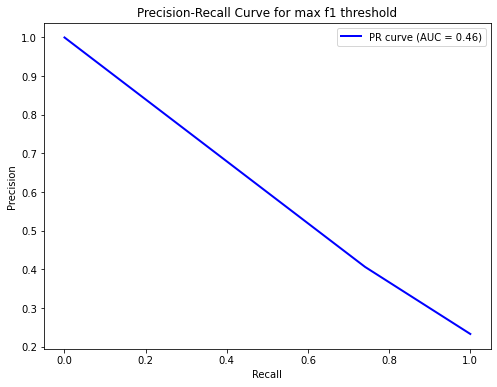

In [90]:
evaluate_classification_model(best_mlp_model, X_test, y_test)

In [91]:
# Predict on the training set
y_train_pred = best_mlp_model.predict(X_train_us)

# Predict on the testing set
y_test_pred = best_mlp_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.71
Testing Accuracy: 0.67
